In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True #This setting enables automatic layout adjustment for figures, potentially improving the appearance and readability of plots and images generated by matplotlib. It ensures that the plot elements are nicely fitted within the figure window, preventing overlapping or clipping

In [ ]:
#scale the pixel values of an image to a range of 0 to 255
def scale_image(input_img):
    input_img = input_img / np.max(input_img) #normalizes the image data, ensuring that all values fall between 0 and 1
    input_img = (input_img*255).astype('int') #scales the pixel values to the desired range of 0 to 255 and converts them to integers
    return input_img


def plot_results(input_img, output_img, x_values, y_values, save_as):

    # plotting the graph
    plt.figure(figsize = (36,12))

    plt.subplot(131)
    plt.imshow(input_img)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(132)
    plt.plot(x_values, y_values)
    plt.xlabel('Input Pixels')
    plt.ylabel('Output Pixels')
    plt.grid(True)

    plt.subplot(133)
    plt.imshow(output_img)
    plt.title('Transformed Image')
    plt.axis('off')

    plt.savefig(save_as + '.png')

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CV & IP/images/Fig0310(b)(washed_out_pollen_image).tif')

(-0.5, 888.5, 888.5, -0.5)

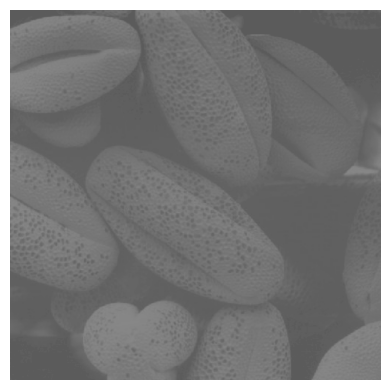

In [ ]:
plt.figure(figsize = (8,4))
plt.imshow(img)
plt.axis('off')

In [ ]:
def piecewiseLinear(r, r1, s1, r2, s2):
    if r < r1:
        s = (s1 / r1) * r
    elif r > r1 and r < r2:
        s = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
    else:
        s = ((255 -s2) / (255 - r2)) * (r - r2) + s2

    return int(s)

In [ ]:
piecewiseLinearVec = np.vectorize(piecewiseLinear)

In [ ]:
x_values = np.linspace(0,255,500)
y_values = piecewiseLinearVec(x_values, 80, 30, 150, 190)

In [ ]:
transformed_im = piecewiseLinearVec(img, 80, 30, 150, 190)

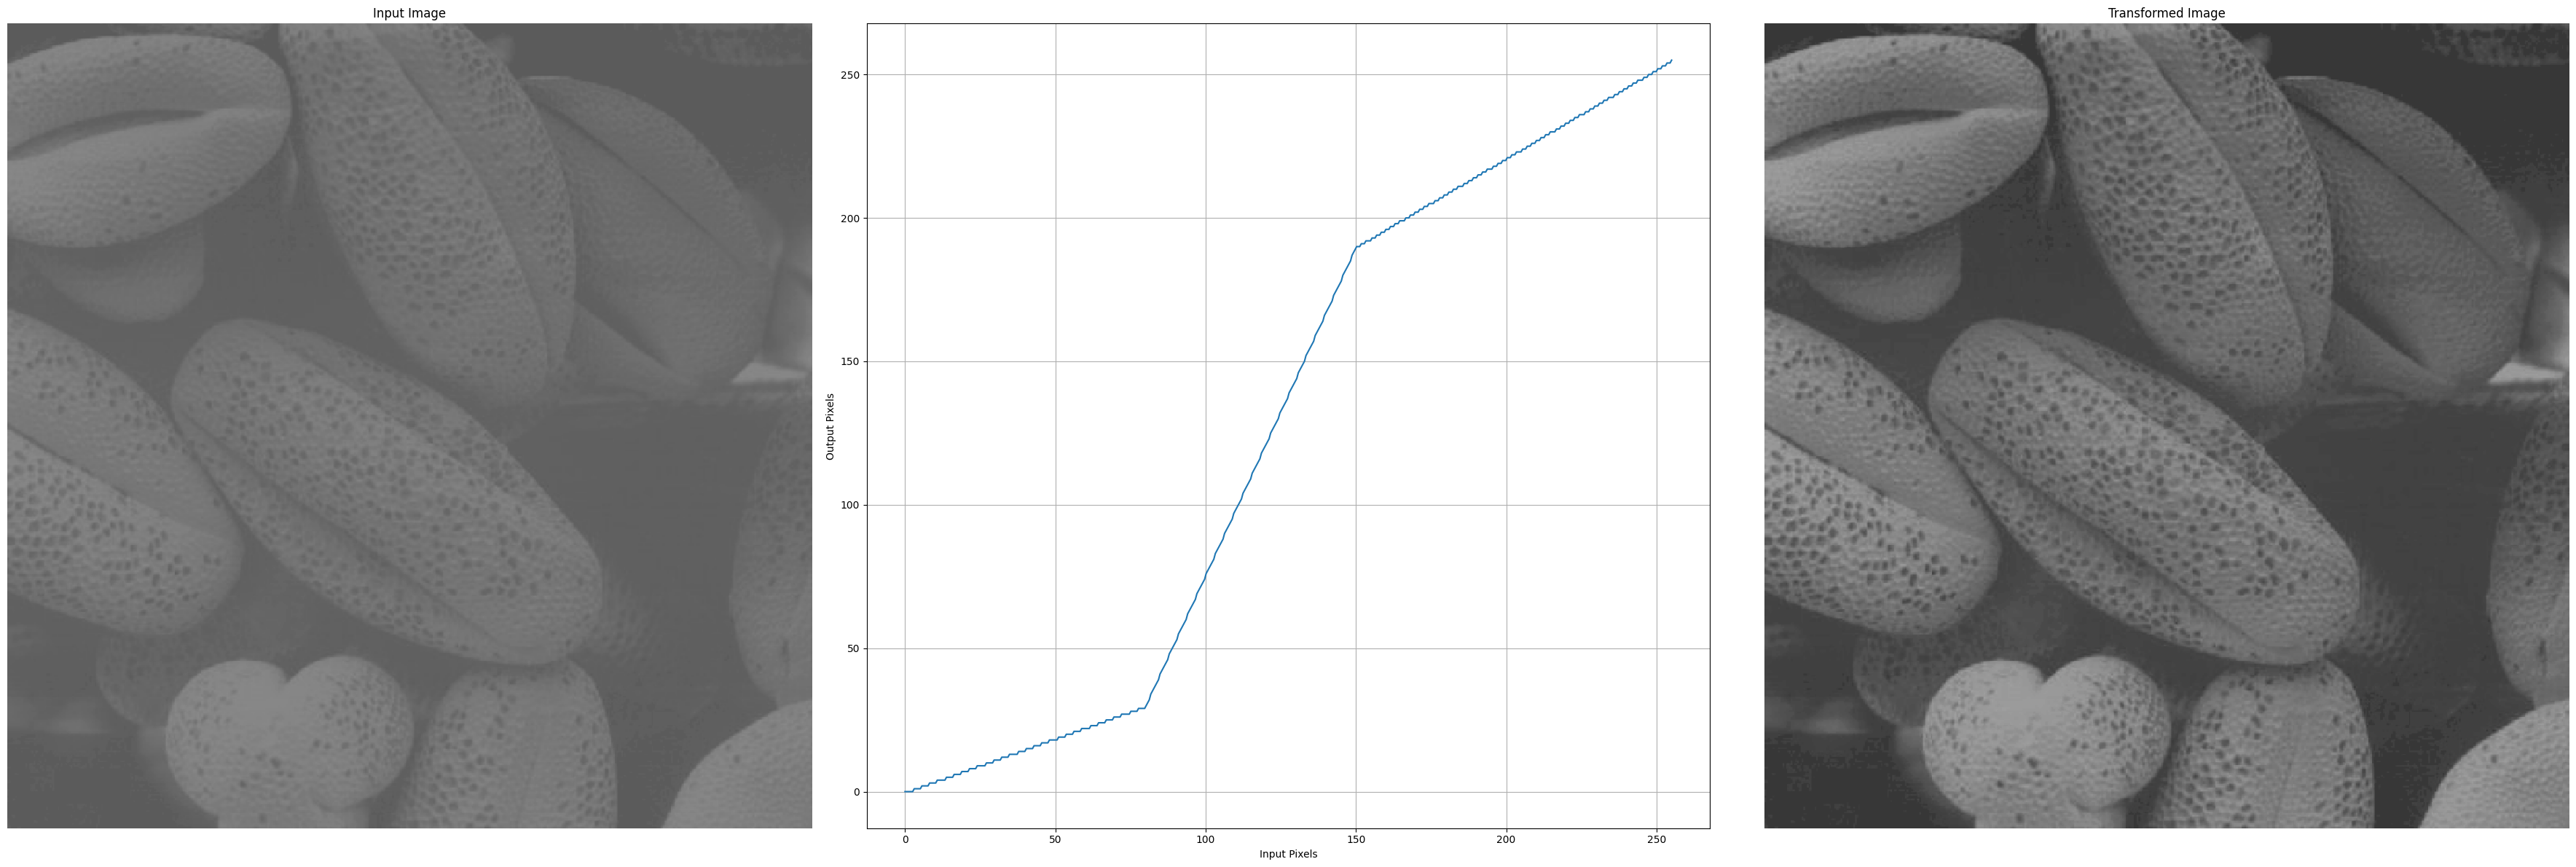

In [ ]:
plot_results(img, transformed_im, x_values, y_values, 'piecewise1')

##Using different values for (r1, s1) , (r2, s2)

In [ ]:
m = np.mean(img)

transformed_img2 = piecewiseLinearVec(img, m, 0, m, 255)

In [ ]:
x_values = np.linspace(0,255,500)
y_values = piecewiseLinearVec(x_values, m, 0, m, 255)

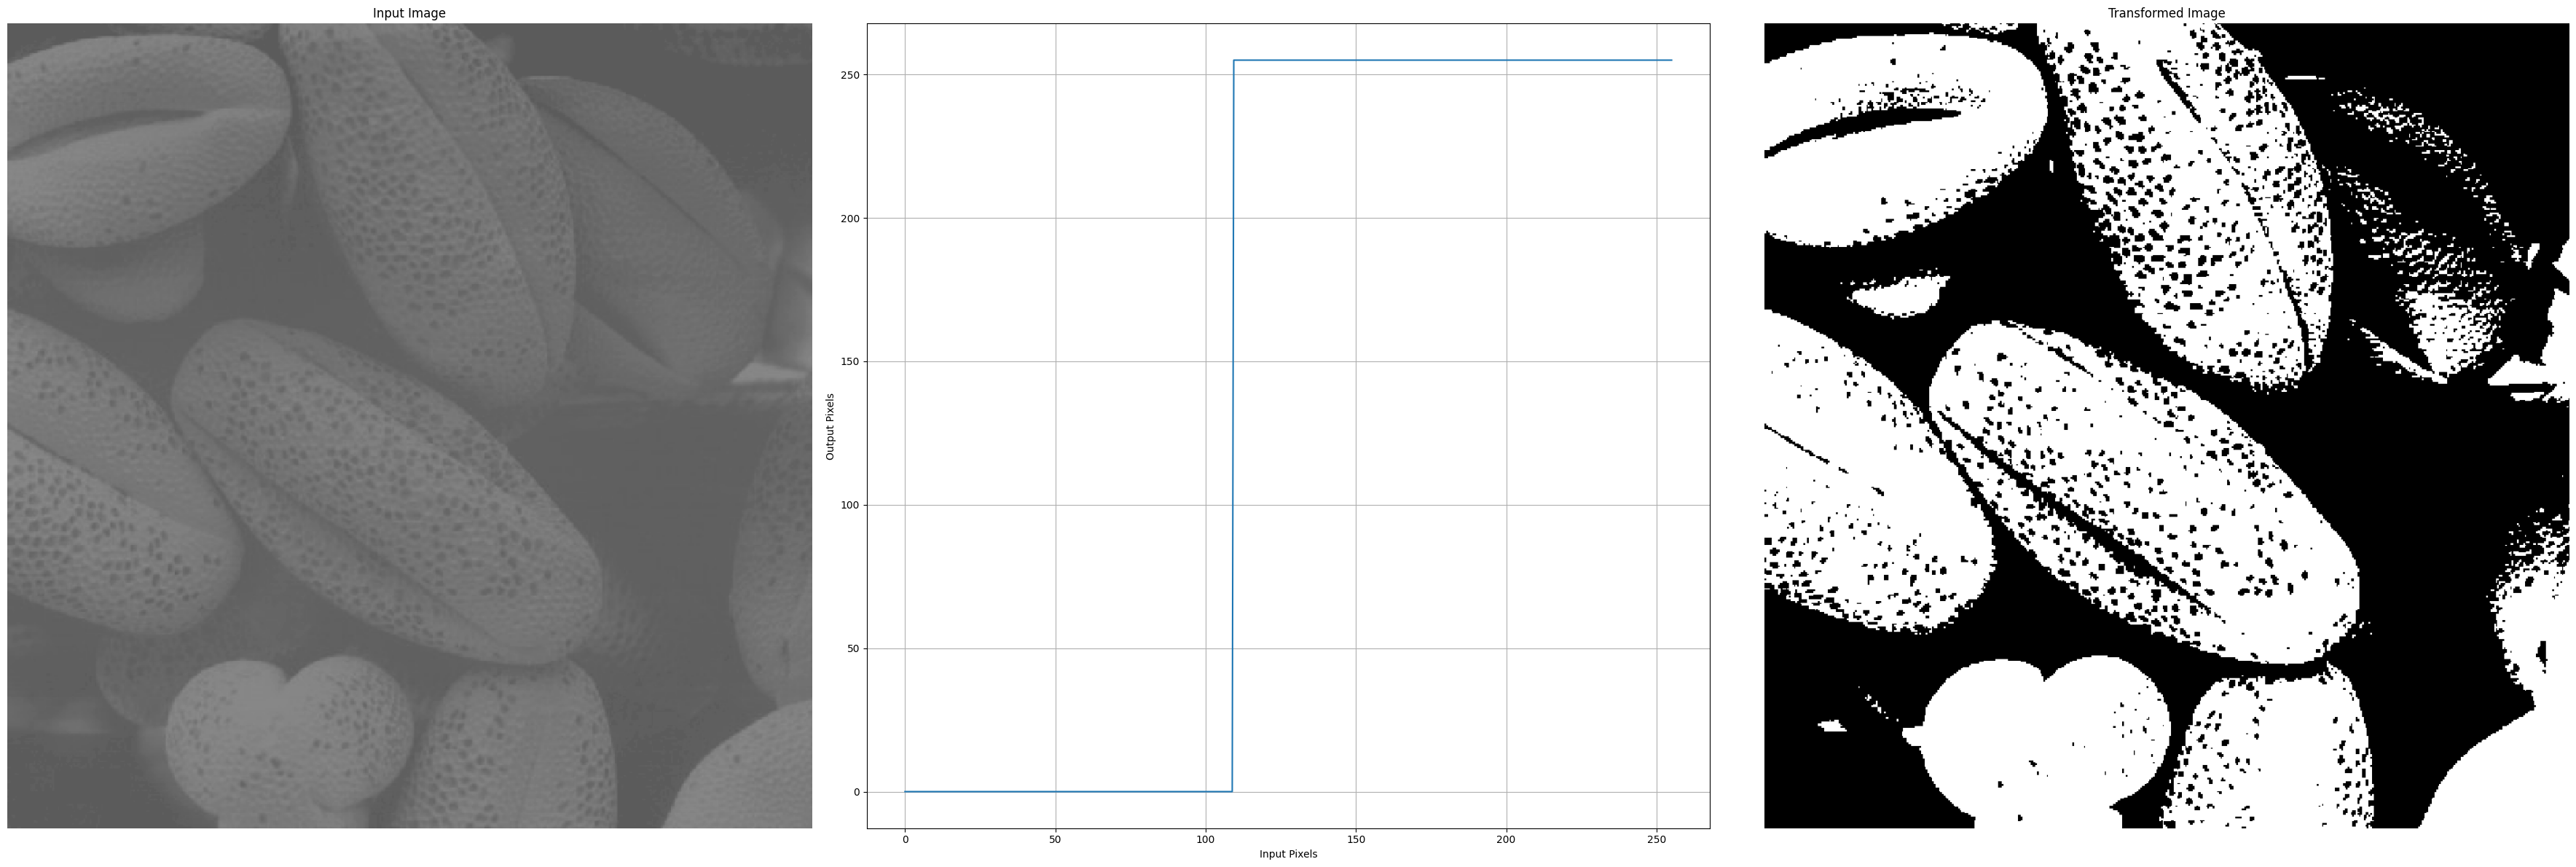

In [ ]:
plot_results(img, transformed_img2, x_values, y_values, 'piecewise2')